In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [17]:
# Load the dataset
dataset_path = "/content/water_potability.csv"
df = pd.read_csv(dataset_path)

In [18]:
# Data Preprocessing: Handling missing values
df.fillna(df.mean(), inplace=True)

In [32]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [33]:
# Splitting features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [34]:
# Show class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())


Class distribution before SMOTE:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [21]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Show class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
Potability
0    1998
1    1998
Name: count, dtype: int64


In [37]:
# Splitting data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [38]:
# Define Neural Network Model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [40]:
# Get input shape from X_train
input_shape = X_train.shape[1]

# Build model with specified input shape
model = build_model(input_shape)
model.summary()

# Define early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,369 (40.50 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.5602 - loss: 1.2596 - val_accuracy: 0.5426 - val_loss: 1.1340
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6481 - loss: 1.0534 - val_accuracy: 0.5392 - val_loss: 1.0951
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6886 - loss: 0.9583 - val_accuracy: 0.5643 - val_loss: 1.0323
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6817 - loss: 0.9075 - val_accuracy: 0.5960 - val_loss: 0.9613
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6961 - loss: 0.8638 - val_accuracy: 0.6093 - val_loss: 0.9283
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.8241 - val_accuracy: 0.6244 - val_loss: 0.9055
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7205 - loss: 0.7730 - val_accuracy: 0.6277 - val_loss: 0.8804
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7317 - loss: 0.7589 - val_accuracy: 0.6244 - val_loss

In [52]:
# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix and Metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       313
           1       0.64      0.66      0.65       287

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.66      0.66      0.66       600

Confusion Matrix:
 [[205 108]
 [ 97 190]]
Accuracy: 0.6583
Precision: 0.6376
Recall: 0.6620
F1 Score: 0.6496


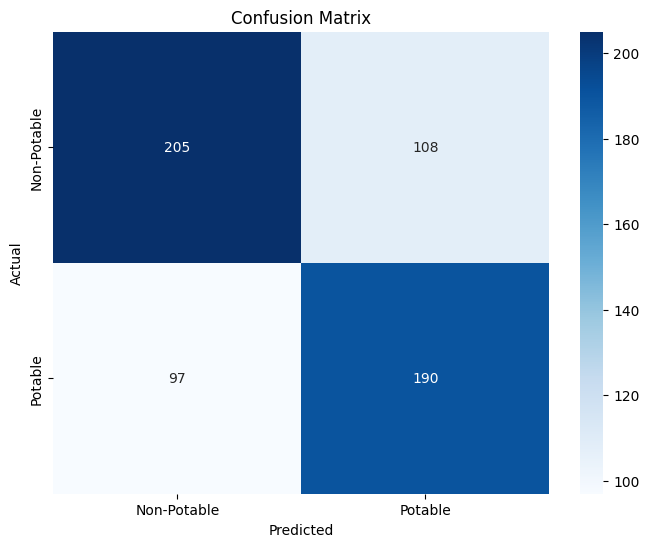

In [53]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Potable', 'Potable'], yticklabels=['Non-Potable', 'Potable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

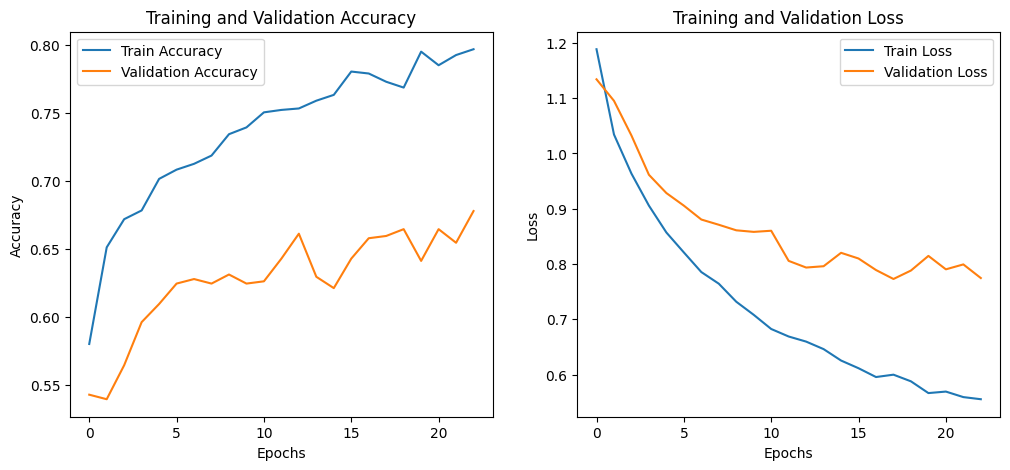

In [54]:

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
